In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [32]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [33]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [34]:
sub = pd.read_csv('/content/sample_submission.csv')
sub.shape

(23490, 2)

In [35]:
sub

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [38]:
print(train.shape)
print(test.shape)

(54808, 14)
(23490, 13)


In [39]:
print(train.isnull().sum())
print(test.isnull().sum())

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64
employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64


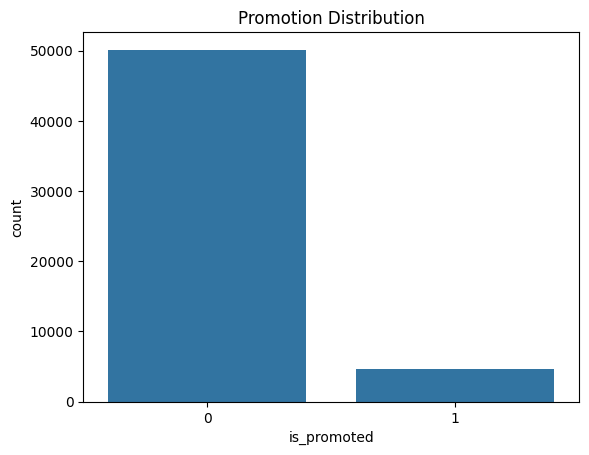

In [40]:
sns.countplot(x='is_promoted', data=train)
plt.title("Promotion Distribution")
plt.show()

Preprocessing

In [41]:
test_employee_id = test['employee_id']                                          #to svae it for final

In [42]:
train.drop('employee_id', axis=1, inplace=True)
test.drop('employee_id', axis=1, inplace=True)

In [43]:
train['education'].fillna(train['education'].mode()[0], inplace=True)
test['education'].fillna(test['education'].mode()[0], inplace=True)

/tmp/ipython-input-43-2737960011.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['education'].fillna(train['education'].mode()[0], inplace=True)
/tmp/ipython-input-43-2737960011.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [44]:
train['previous_year_rating'].fillna(train['previous_year_rating'].median(), inplace=True)
test['previous_year_rating'].fillna(test['previous_year_rating'].median(), inplace=True)

/tmp/ipython-input-44-2921879404.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['previous_year_rating'].fillna(train['previous_year_rating'].median(), inplace=True)
/tmp/ipython-input-44-2921879404.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [45]:
print(train.isnull().sum())
print(test.isnull().sum())

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64


In [46]:
cat_col = ['department', 'region', 'education', 'gender', 'recruitment_channel']

In [47]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in cat_col:
  train[col] = LE.fit_transform(train[col])
  test[col] = LE.fit_transform(test[col])

In [48]:
from sklearn.model_selection import train_test_split
X = train.drop('is_promoted', axis=1)
y = train['is_promoted']

# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 20% Testing 75 and Training (80%)
print(X.shape)
print(y.shape)

(54808, 12)
(54808,)


In [49]:
print(X_test.shape)
print(y_test.shape)

(10962, 12)
(10962,)


In [50]:
X_test

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
40907,2,7,0,1,0,1,35,5.0,10,0,0,47
51939,7,31,0,1,0,3,33,1.0,4,0,0,51
6978,1,11,0,1,0,2,38,3.0,11,0,0,64
12814,4,14,0,0,0,1,33,1.0,8,0,0,56
22921,8,31,0,0,0,1,37,1.0,4,0,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...
3458,0,31,0,1,0,1,35,3.0,2,0,0,83
26056,7,11,0,1,2,2,50,5.0,3,1,0,45
29981,7,15,2,1,0,1,39,5.0,4,1,0,50
44352,7,31,0,0,0,1,31,2.0,5,0,0,49


In [51]:
print(X_train.shape)
print(y_train.shape)

(43846, 12)
(43846,)


In [52]:
import joblib

Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
LR_pred = model.predict(X_test)

joblib.dump(model,'LR.pkl')

['LR.pkl']

In [54]:
LR_pred.shape

(10962,)

kNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
KNN_pred = model.predict(X_test)

joblib.dump(model,'KNN.pkl')

['KNN.pkl']

SVM

In [56]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)
SVM_pred = model.predict(X_test)

joblib.dump(model,'SVM.pkl')

['SVM.pkl']

Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
NB_pred = model.predict(X_test)

joblib.dump(model,'NB.pkl')

['NB.pkl']

Decision tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
DT_pred = model.predict(X_test)

joblib.dump(model,'DT.pkl')

['DT.pkl']

Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)
RF_pred = model.predict(X_test)

joblib.dump(model,'RF.pkl')

['RF.pkl']

MLP

In [60]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(10,10,5), max_iter=1000, random_state=42)
model.fit(X_train, y_train)
MLP_pred = model.predict(X_test)

joblib.dump(model,'MLP.pkl')

['MLP.pkl']

Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
GB_pred = model.predict(X_test)

joblib.dump(model,'GB.pkl')

['GB.pkl']

XGB

In [62]:
from xgboost import XGBClassifier

model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)
XGB_pred = model.predict(X_test)

joblib.dump(model,'XGB.pkl')

['XGB.pkl']

In [63]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Logistic Regression
Accuracy: 0.919722678343368
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10054
           1       0.66      0.06      0.12       908

    accuracy                           0.92     10962
   macro avg       0.79      0.53      0.54     10962
weighted avg       0.90      0.92      0.89     10962



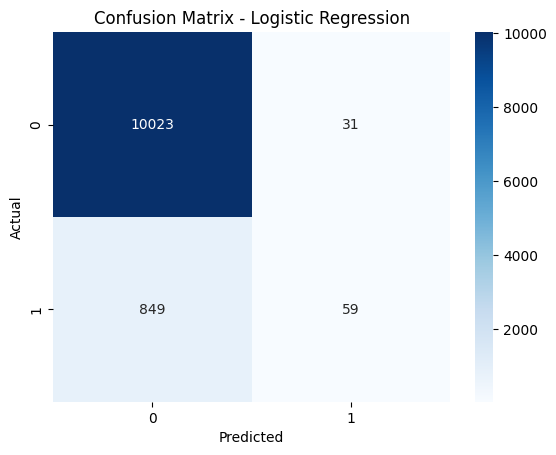

In [64]:
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, LR_pred))
print(classification_report(y_test, LR_pred))

cm = confusion_matrix(y_test, LR_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

k-Nearest Neighbors
Accuracy: 0.9261995986133917
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10054
           1       0.73      0.18      0.28       908

    accuracy                           0.93     10962
   macro avg       0.83      0.58      0.62     10962
weighted avg       0.91      0.93      0.90     10962



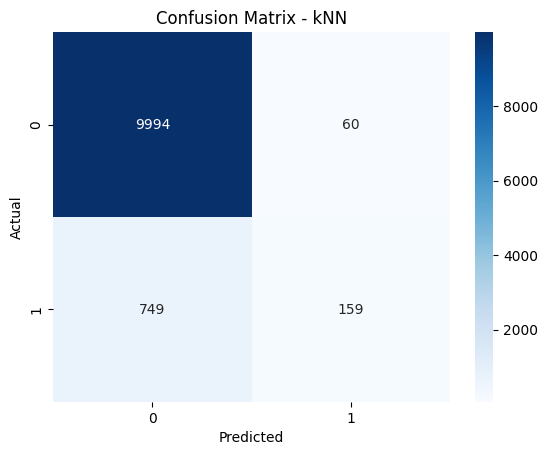

In [65]:
print("k-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, KNN_pred))
print(classification_report(y_test, KNN_pred))

cm = confusion_matrix(y_test, KNN_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - kNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Support Vector Machine
Accuracy: 0.9171683999270206
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10054
           1       0.00      0.00      0.00       908

    accuracy                           0.92     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.84      0.92      0.88     10962



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


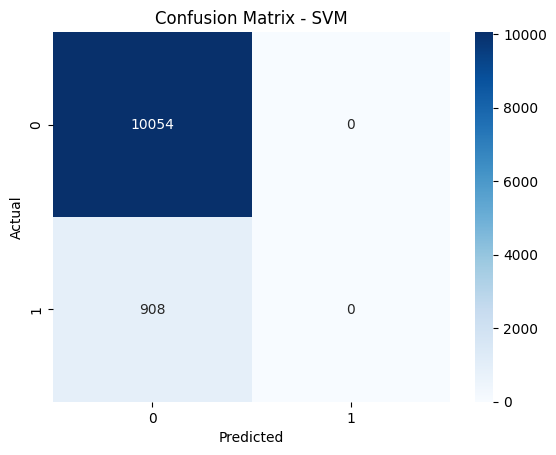

In [66]:
print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, SVM_pred))
print(classification_report(y_test, SVM_pred))

cm = confusion_matrix(y_test, SVM_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 Naive Bayes
Accuracy: 0.9151614668856048
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10054
           1       0.46      0.13      0.20       908

    accuracy                           0.92     10962
   macro avg       0.69      0.56      0.58     10962
weighted avg       0.89      0.92      0.89     10962



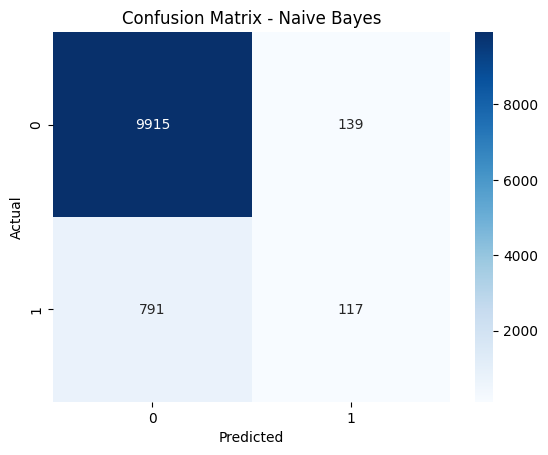

In [67]:
print(" Naive Bayes")
print("Accuracy:", accuracy_score(y_test, NB_pred))
print(classification_report(y_test, NB_pred))

cm = confusion_matrix(y_test, NB_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 Decision Tree
Accuracy: 0.8971902937420179
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10054
           1       0.40      0.46      0.42       908

    accuracy                           0.90     10962
   macro avg       0.67      0.70      0.68     10962
weighted avg       0.90      0.90      0.90     10962



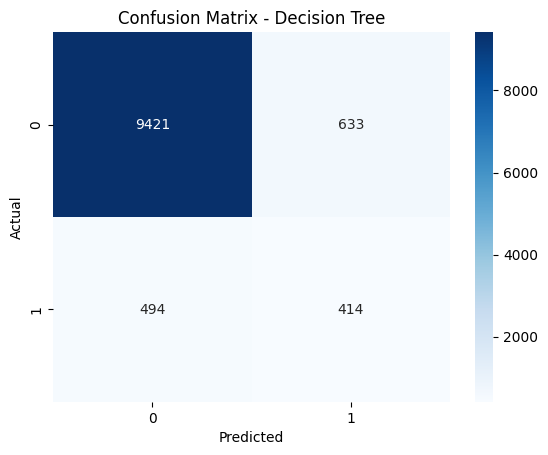

In [68]:
print(" Decision Tree")
print("Accuracy:", accuracy_score(y_test, DT_pred))
print(classification_report(y_test, DT_pred))

cm = confusion_matrix(y_test, DT_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 Random Forest
Accuracy: 0.9356869184455391
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.81      0.29      0.43       908

    accuracy                           0.94     10962
   macro avg       0.88      0.64      0.70     10962
weighted avg       0.93      0.94      0.92     10962



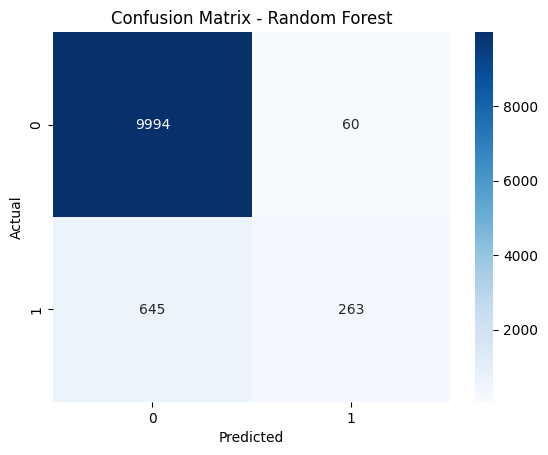

In [69]:
print(" Random Forest")
print("Accuracy:", accuracy_score(y_test, RF_pred))
print(classification_report(y_test, RF_pred))

cm = confusion_matrix(y_test, RF_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 MLP Classifier
Accuracy: 0.9374201787994891
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.93      0.27      0.41       908

    accuracy                           0.94     10962
   macro avg       0.93      0.63      0.69     10962
weighted avg       0.94      0.94      0.92     10962



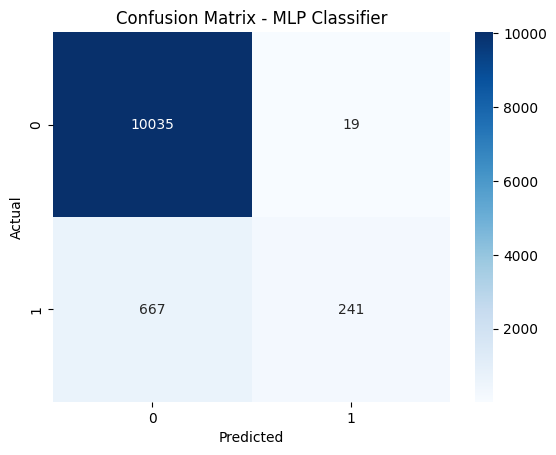

In [70]:
print(" MLP Classifier")
print("Accuracy:", accuracy_score(y_test, MLP_pred))
print(classification_report(y_test, MLP_pred))

cm = confusion_matrix(y_test, MLP_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - MLP Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 Gradient Boosting
Accuracy: 0.9400656814449918
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.95      0.29      0.45       908

    accuracy                           0.94     10962
   macro avg       0.95      0.64      0.71     10962
weighted avg       0.94      0.94      0.93     10962



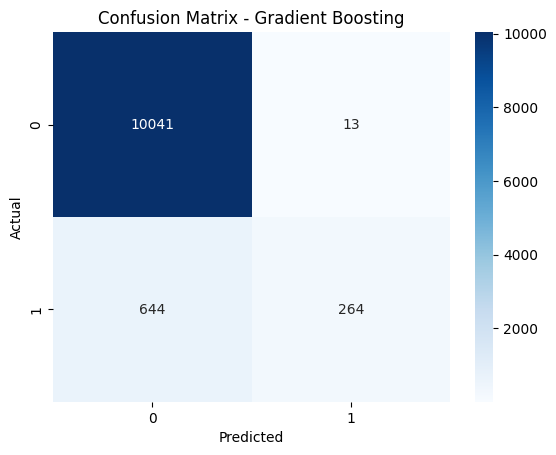

In [71]:
print(" Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, GB_pred))
print(classification_report(y_test, GB_pred))

cm = confusion_matrix(y_test, GB_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [72]:
len(y_test)

10962

 XGBoost Classifier
Accuracy: 0.9417989417989417
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.87      0.35      0.50       908

    accuracy                           0.94     10962
   macro avg       0.91      0.67      0.73     10962
weighted avg       0.94      0.94      0.93     10962



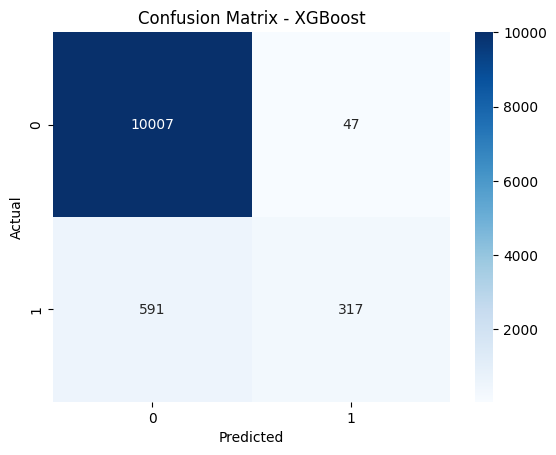

In [73]:
print(" XGBoost Classifier")
print("Accuracy:", accuracy_score(y_test, XGB_pred))
print(classification_report(y_test, XGB_pred))

cm = confusion_matrix(y_test, XGB_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Fine Tuning (HyperParameter Tuning)

In [74]:
# kNN hyperparameter tuning
for k in [3, 5, 7, 9]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    KNN_pred = model.predict(X_test)

    print(f"k-Nearest Neighbors for {k}")
    print("Accuracy:", accuracy_score(y_test, KNN_pred))
    print(classification_report(y_test, KNN_pred))


k-Nearest Neighbors for 3
Accuracy: 0.9211822660098522
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     10054
           1       0.56      0.22      0.32       908

    accuracy                           0.92     10962
   macro avg       0.75      0.60      0.64     10962
weighted avg       0.90      0.92      0.91     10962

k-Nearest Neighbors for 5
Accuracy: 0.9261995986133917
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10054
           1       0.73      0.18      0.28       908

    accuracy                           0.93     10962
   macro avg       0.83      0.58      0.62     10962
weighted avg       0.91      0.93      0.90     10962

k-Nearest Neighbors for 7
Accuracy: 0.927659186279876
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10054
           1       0.85      0.15      0.26       908

    accuracy      

In [75]:
# SVM hyperparameter tuning
for k in ['linear', 'rbf', 'poly']:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    SVC_pred = model.predict(X_test)

    print(f"Support Vector Machine for k={k}")
    print("Accuracy:", accuracy_score(y_test, SVM_pred))
    print(classification_report(y_test, SVM_pred))


Support Vector Machine for k=linear
Accuracy: 0.9171683999270206
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10054
           1       0.00      0.00      0.00       908

    accuracy                           0.92     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.84      0.92      0.88     10962



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Support Vector Machine for k=rbf
Accuracy: 0.9171683999270206
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10054
           1       0.00      0.00      0.00       908

    accuracy                           0.92     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.84      0.92      0.88     10962



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Support Vector Machine for k=poly
Accuracy: 0.9171683999270206
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10054
           1       0.00      0.00      0.00       908

    accuracy                           0.92     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.84      0.92      0.88     10962



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [76]:
# Random-Forest hyperparameter tuning
for n in [50, 100, 150]:
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    RF_pred = model.predict(X_test)

    print(f"Random Forest for n={n}")
    print("Accuracy:", accuracy_score(y_test, RF_pred))
    print(classification_report(y_test, RF_pred))


Random Forest for n=50
Accuracy: 0.9348659003831418
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.80      0.28      0.42       908

    accuracy                           0.93     10962
   macro avg       0.87      0.64      0.69     10962
weighted avg       0.93      0.93      0.92     10962

Random Forest for n=100
Accuracy: 0.9355956942163839
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.82      0.28      0.42       908

    accuracy                           0.94     10962
   macro avg       0.88      0.64      0.69     10962
weighted avg       0.93      0.94      0.92     10962

Random Forest for n=150
Accuracy: 0.9361430395913155
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.82      0.29      0.43       908

    accuracy            

From the above result , XGBoost has the higher Score value

In [77]:
# Hyperparameter tuning(automated)
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# Define model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search with 3-fold CV and F1 scoring
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

# Fit on training data
grid_search.fit(X, y)

# Best model
best_model_grid = grid_search.best_estimator_

# Predict on test
test_preds_grid = best_model_grid.predict(test)

# Save to CSV
sub['is_promoted'] = test_preds_grid
sub.to_csv('final_submission_grid.csv', index=False)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:55:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
